# **Flipkart Laptop Listing - EDA**
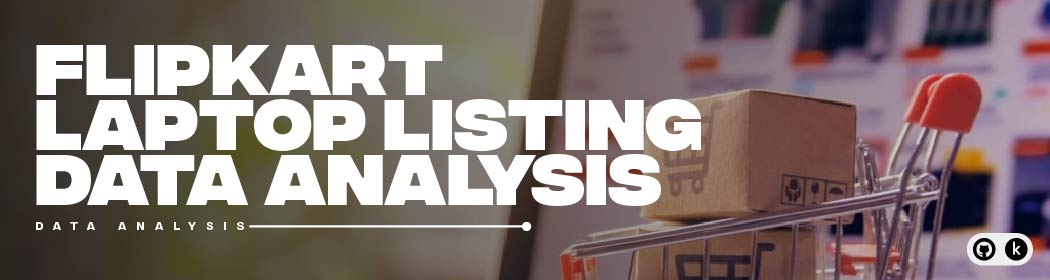

This repository contains the code and documentation for analyzing the laptop price data extracted from Flipkart. The data has been sourced from [**here**](https://www.kaggle.com/datasets/manjitbaishya001/flipkart-laptop-price-dataset) and the corresponding [Kaggle](https://www.kaggle.com/manjitbaishya001/flipkart-laptop-listing-eda/edit) and GitHub sources have also been linked.

## **About the Dataset**

This dataset comprises of data of the listings in **Flipkart** for Laptops, as of **November 2023**. This has been scraped with the help of **[AutoScraper](https://pypi.org/project/autoscraper/)** and the entire project has been posted [**here**](https://github.com/manjit-baishya-2023/Flipkart-Laptop-Data-Analysis).

The dataset comprises of two columns:
- **laptop:** lists the names of all the laptops
- **price:** lists the respective prices of the laptops

This project deals with visualization tasks and several comparative analysis. It also deals with better presentation and visual demonstration skills and techniques.

# **Importing Libraries and Data**
---
Here, we will import all the required `libraries` for the project and all the `source files` necessary.

In [1]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import warnings
warnings.filterwarnings("ignore")

In [2]:
# colour themes
pair_colours = ['#41436A', '#FE9677']

In [3]:
# importing data
df = pd.read_csv("laptop_price.csv")

In [4]:
# viewing data
df.head()

,laptop,price
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,"₹17,990"
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,"₹3,44,990"
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,"₹38,990"
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,"₹41,990"
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,"₹29,990"


# **Data Cleaning**
---
The data cleaning process for the following will be ***ellaborative*** as we have a lot of data cleaning to do. We will first process the pricing of the laptops and then we will extract valuable information from the name of the laptops.

### **1. Prices**

Here, we clear all non-numeric data and convert **string** to **integer**.

In [5]:
# checking column data type
type(df['price'][0])

str

In [6]:
# stripping away all non-numeric data
df['price'] = df['price'].str.replace('₹', '').str.replace(',', '')
df.head()

,laptop,price
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990


In [7]:
# converting price to integer
print(type(df['price'][0]))
df['price'] = pd.to_numeric(df['price'])
print(type(df['price'][0]))

<class 'str'>
<class 'numpy.int64'>


### **2. CPU**

Here, we will add a column called **cpu** and enter either **amd** or **intel** in it.

In [8]:
# adding new column
df['cpu'] = 'NA'

I have gone over the CSV file and made multiple searches over the entire dataset to determine the following conditions. 

In [9]:
# Function to determine CPU type
def get_cpu_type(laptop_name):
    if 'AMD' in laptop_name or 'Ryzen' in laptop_name:
        return 'AMD'
    elif 'Intel' in laptop_name or 'Core' in laptop_name or 'Pentium' in laptop_name:
        return 'Intel'
    elif 'MediaTek' in laptop_name or 'MT' in laptop_name:
        return 'Mediatek'
    elif 'M1' in laptop_name or 'M2' in laptop_name or 'M3' in laptop_name:
        return 'Apple'
    else:
        return 'Unknown'

# Apply the function to create a new 'cpu' column
df['cpu'] = df['laptop'].apply(get_cpu_type)

df.head()

,laptop,price,cpu
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel


In [10]:
# checking for null CPU values
df['cpu'].unique()

array(['Intel', 'AMD', 'Mediatek', 'Apple'], dtype=object)

As now all the fields in **CPU** have been filled, we mode forward to **manufacturer**.

In [11]:
# adding new column
df['manufacturer'] = None
df.head()

,laptop,price,cpu,manufacturer
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,None
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,None
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,None
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,None
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,None


### **3. Manufacturer**

As first step, we can see that most of the laptops have their **first word** in their names as the name of the **manufacturer**. So we are going to extract the first word and set it as manufacturer.

In [12]:
# setting first name as manufacturer
for index, value in enumerate(df['laptop']):
    df.loc[index, 'manufacturer'] = value.split()[0]

df.head()

,laptop,price,cpu,manufacturer
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,AXL
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,MSI
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,ASUS
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,HP
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,HP


In [13]:
# checking if there is any mistake
df['manufacturer'].unique()

array(['AXL', 'MSI', 'ASUS', 'HP', 'Acer', 'Lenovo', 'Wings', 'Primebook',
       'DELL', 'Infinix', 'GIGABYTE', 'realme', 'SAMSUNG', 'CHUWI',
       'MICROSOFT', 'APPLE', 'ZEBRONICS', 'Ultimus'], dtype=object)

### **4. Storage Type**

Laptop storage solutions are basically of two types, **Solid State Drives(SSD)** and **Hard Disk Drives(HDD)**. Some laptops even have both and are called **Hybrid Storage Solutions**. We now determine the type of storage the laptops have within these 3 classifications.

In [14]:
# setting new column
df['storage_type'] = None

# performing classification
for index, value in enumerate(df['laptop']):
    if 'HDD' in value and 'SSD' in value:
        df.loc[index, 'storage_type'] = 'Hybrid'
    else:
        if 'HDD' in value:
            df.loc[index, 'storage_type'] = 'HDD'
        elif 'SSD' in value:
            df.loc[index, 'storage_type'] = 'SSD'
        elif 'EMMC' in value:
            df.loc[index, 'storage_type'] = 'EMMC'

df.head()

,laptop,price,cpu,manufacturer,storage_type
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,AXL,SSD
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,MSI,SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,ASUS,SSD
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,HP,SSD
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,HP,SSD


In [15]:
# checking if all values are filled
df.isna().sum()

laptop          0
price           0
cpu             0
manufacturer    0
storage_type    9
dtype: int64

* **These are very few so we drop them.**

In [16]:
df = df.dropna().reset_index(drop=True)
df

,laptop,price,cpu,manufacturer,storage_type
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,AXL,SSD
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,MSI,SSD
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,ASUS,SSD
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,HP,SSD
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,HP,SSD
...,...,...,...,...,...
514,Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5500...,53990,AMD,Lenovo,SSD
515,ASUS Core i3 12th Gen - (8 GB/512 GB SSD/Windo...,38980,Intel,ASUS,SSD
516,ASUS Vivobook 15 Core i5 12th Gen i5-1240P - (...,62390,Intel,ASUS,SSD
517,ASUS ROG Flow Z13 (2023) Intel H-Series Core i...,209990,Intel,ASUS,SSD


### **5. RAM, HDD and SSD capacity**

The basic structure of Flipkart listing is that within the round braces, the first value is for **RAM** and the second is for **Storage Size**. We extract the values accordingly.

In [17]:
# adding new column
df['ram'] = None
df['storage'] = None

df

,laptop,price,cpu,manufacturer,storage_type,ram,storage
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,AXL,SSD,None,None
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,MSI,SSD,None,None
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,ASUS,SSD,None,None
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,HP,SSD,None,None
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,HP,SSD,None,None
...,...,...,...,...,...,...,...
514,Lenovo IdeaPad Gaming 3 Ryzen 5 Hexa Core 5500...,53990,AMD,Lenovo,SSD,None,None
515,ASUS Core i3 12th Gen - (8 GB/512 GB SSD/Windo...,38980,Intel,ASUS,SSD,None,None
516,ASUS Vivobook 15 Core i5 12th Gen i5-1240P - (...,62390,Intel,ASUS,SSD,None,None
517,ASUS ROG Flow Z13 (2023) Intel H-Series Core i...,209990,Intel,ASUS,SSD,None,None


In [18]:
# extracting the data based on the type of data avilable
for index, value in enumerate(df['storage_type']):
    text = df['laptop'].iloc[index].split('/')
    text[0] = text[0].split('- (')[1]

    df.loc[index, 'ram'] = int(re.sub(r'[^0-9]', '', text[0]))

    if 'Hybrid' in value:
        ssd_size = int(re.sub(r'[^0-9]', '', text[1]))
        hdd_size = int(re.sub(r'[^0-9]', '', text[2]))
        emmc_size = 0
    elif 'SSD' in value:
        ssd_size = int(re.sub(r'[^0-9]', '', text[1]))
        hdd_size = 0
        emmc_size = 0
    elif 'HDD' in value:
        ssd_size = 0
        hdd_size = int(re.sub(r'[^0-9]', '', text[1]))
        emmc_size = 0
    else:
        ssd_size = 0
        hdd_size = 0
        emmc_size = int(re.sub(r'[^0-9]', '', text[1]))

    # Conditional multiplication by 1024
    ssd_size = ssd_size * 1024 if ssd_size < 10 else ssd_size
    hdd_size = hdd_size * 1024 if hdd_size < 10 else hdd_size
    emmc_size = emmc_size * 1024 if emmc_size < 10 else emmc_size

    # Summing up the values and assigning to the 'storage' column
    df.loc[index, 'storage'] = ssd_size + hdd_size + emmc_size

df.head()

,laptop,price,cpu,manufacturer,storage_type,ram,storage
0,AXL Celeron Dual Core 9th Gen - (4 GB/256 GB S...,17990,Intel,AXL,SSD,4,256
1,MSI Vector GP78 Core i9 13th Gen 13980HX - (32...,344990,Intel,MSI,SSD,32,2048
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7 - (8 ...,38990,Intel,ASUS,SSD,8,512
3,HP (2023) Intel Core i3 12th Gen 1215U - (8 GB...,41990,Intel,HP,SSD,8,512
4,HP 2023 Athlon Dual Core 3050U - (8 GB/512 GB ...,29990,Intel,HP,SSD,8,512


In [19]:
df['ram'].unique()

array([4, 32, 8, 16, 18, 832], dtype=object)

In [20]:
index = df[df['ram'] == 832].index[0]
df['ram'].iloc[index] = 8

* **This data looks correct.**

In [21]:
# removing redundant data
titles = []

for index, row in df.iterrows():
    title = row['laptop'].split(' -')[0]
    titles.append(title)

df['laptop'] = titles
df = df[['laptop', 'cpu', 'manufacturer', 'storage_type', 'ram', 'storage', 'price']]
df.head()

,laptop,cpu,manufacturer,storage_type,ram,storage,price
0,AXL Celeron Dual Core 9th Gen,Intel,AXL,SSD,4,256,17990
1,MSI Vector GP78 Core i9 13th Gen 13980HX,Intel,MSI,SSD,32,2048,344990
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7,Intel,ASUS,SSD,8,512,38990
3,HP (2023) Intel Core i3 12th Gen 1215U,Intel,HP,SSD,8,512,41990
4,HP 2023 Athlon Dual Core 3050U,Intel,HP,SSD,8,512,29990


# **Exploratory Data Analysis**
---

## **Quantitative Analysis**

### **1. Most Expensive Laptop**

In [22]:
highest_price = df['price'].max()
index = df[df['price'] == highest_price].index[0]
df['laptop'].iloc[index]

'ASUS ROG Zephyrus Duo 16 with 90WHr Battery Ryzen 9 16 Core 7945HX'

### **2. Cheapest Laptop**

In [23]:
lowest_price = df['price'].min()
index = df[df['price'] == lowest_price].index[0]
df['laptop'].iloc[index]

'Ultimus Celeron Dual Core'

## **Visual Analysis**
---

In [24]:
# looking at data
df.head()

,laptop,cpu,manufacturer,storage_type,ram,storage,price
0,AXL Celeron Dual Core 9th Gen,Intel,AXL,SSD,4,256,17990
1,MSI Vector GP78 Core i9 13th Gen 13980HX,Intel,MSI,SSD,32,2048,344990
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7,Intel,ASUS,SSD,8,512,38990
3,HP (2023) Intel Core i3 12th Gen 1215U,Intel,HP,SSD,8,512,41990
4,HP 2023 Athlon Dual Core 3050U,Intel,HP,SSD,8,512,29990


### **1. Price Ranges in Intel, AMD and Apple Laptops**

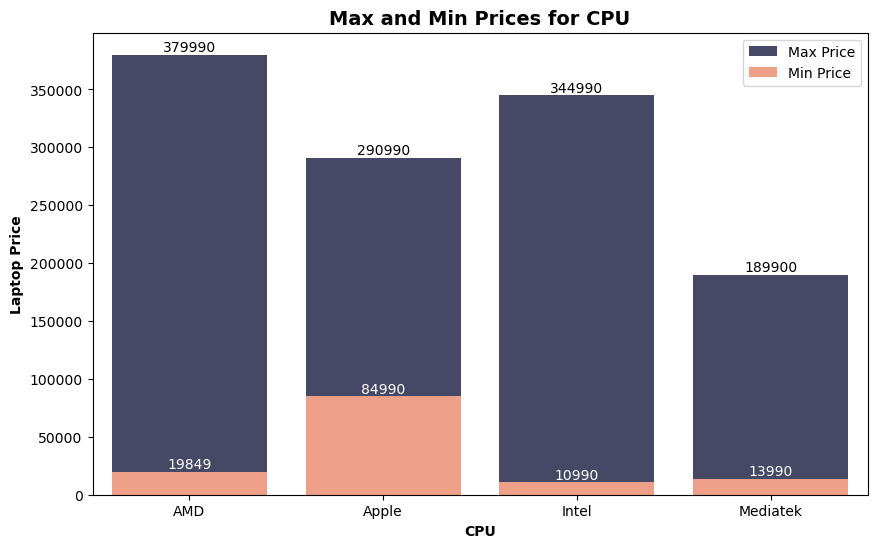

In [25]:
# grouping data
grouped_df = df.groupby('cpu')['price'].agg(['max', 'min']).reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cpu', y='max', data=grouped_df, label='Max Price', color=pair_colours[0])
sns.barplot(x='cpu', y='min', data=grouped_df, label='Min Price', color=pair_colours[1])

# Add annotations for max prices
for i, value in enumerate(grouped_df['max']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')

# Add annotations for min prices
for i, value in enumerate(grouped_df['min']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='white')

plt.xlabel('CPU', fontweight='bold')
plt.ylabel('Laptop Price', fontweight='bold')
plt.title('Max and Min Prices for CPU',fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **2. Storage Ranges in Intel, AMD and Apple Laptops**

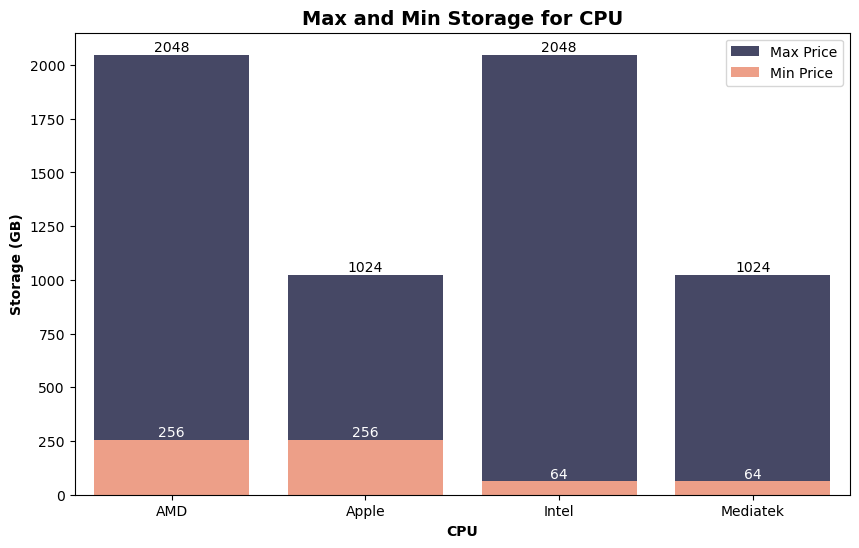

In [26]:
# grouping data
grouped_df = df.groupby('cpu')['storage'].agg(['max', 'min']).reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cpu', y='max', data=grouped_df, label='Max Price', color=pair_colours[0])
sns.barplot(x='cpu', y='min', data=grouped_df, label='Min Price', color=pair_colours[1])

# Add annotations for max prices
for i, value in enumerate(grouped_df['max']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')

# Add annotations for min prices
for i, value in enumerate(grouped_df['min']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='white')

plt.xlabel('CPU', fontweight='bold')
plt.ylabel('Storage (GB)', fontweight='bold')
plt.title('Max and Min Storage for CPU',fontsize=14, fontweight='bold')
plt.legend()
plt.show()

### **3. RAM Ranges in Intel, AMD and Apple Laptops**

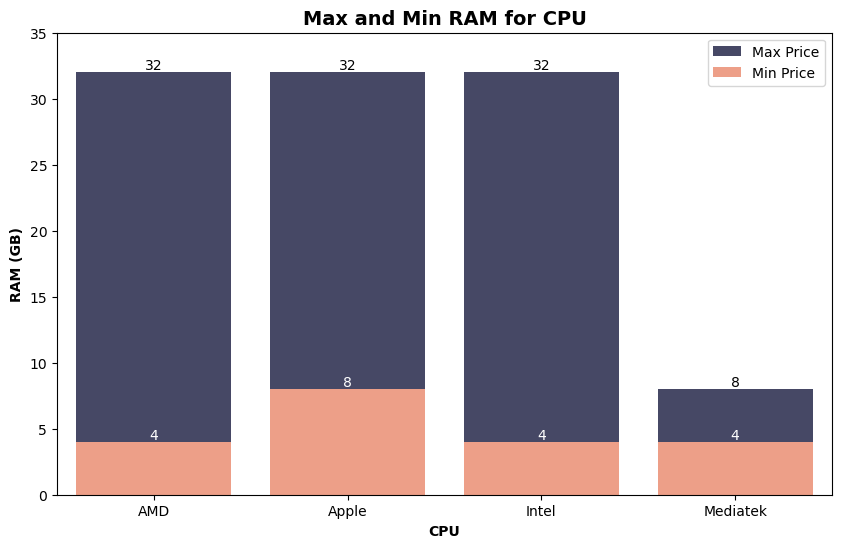

In [27]:
# grouping data
grouped_df = df.groupby('cpu')['ram'].agg(['max', 'min']).reset_index()

# Plotting with seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='cpu', y='max', data=grouped_df, label='Max Price', color=pair_colours[0])
sns.barplot(x='cpu', y='min', data=grouped_df, label='Min Price', color=pair_colours[1])

# Add annotations for max prices
for i, value in enumerate(grouped_df['max']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='black')

# Add annotations for min prices
for i, value in enumerate(grouped_df['min']):
    plt.text(i, value, str(value), ha='center', va='bottom', color='white')

plt.xlabel('CPU', fontweight='bold')
plt.ylabel('RAM (GB)', fontweight='bold')
plt.ylim(0,35)
plt.title('Max and Min RAM for CPU',fontsize=14, fontweight='bold')
plt.legend()
plt.show()

In [28]:
df['cpu'].unique()

array(['Intel', 'AMD', 'Mediatek', 'Apple'], dtype=object)

### **4. Correlation**

In [29]:
df.head()

,laptop,cpu,manufacturer,storage_type,ram,storage,price
0,AXL Celeron Dual Core 9th Gen,Intel,AXL,SSD,4,256,17990
1,MSI Vector GP78 Core i9 13th Gen 13980HX,Intel,MSI,SSD,32,2048,344990
2,ASUS Vivobook 15 Core i5 11th Gen 1135G7,Intel,ASUS,SSD,8,512,38990
3,HP (2023) Intel Core i3 12th Gen 1215U,Intel,HP,SSD,8,512,41990
4,HP 2023 Athlon Dual Core 3050U,Intel,HP,SSD,8,512,29990


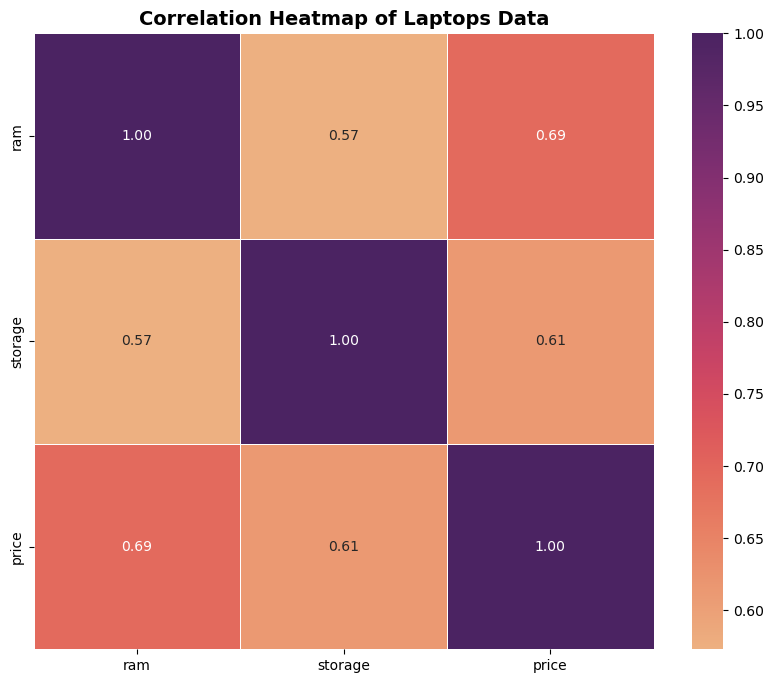

In [30]:
# Compute the correlation matrix
correlation_matrix = df[['ram', 'storage', 'price']].corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='flare', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap of Laptops Data',fontsize=14, fontweight='bold')
plt.show()

- **All these show positive correlation but not very strong.**

### **5. Most Selling Brand**

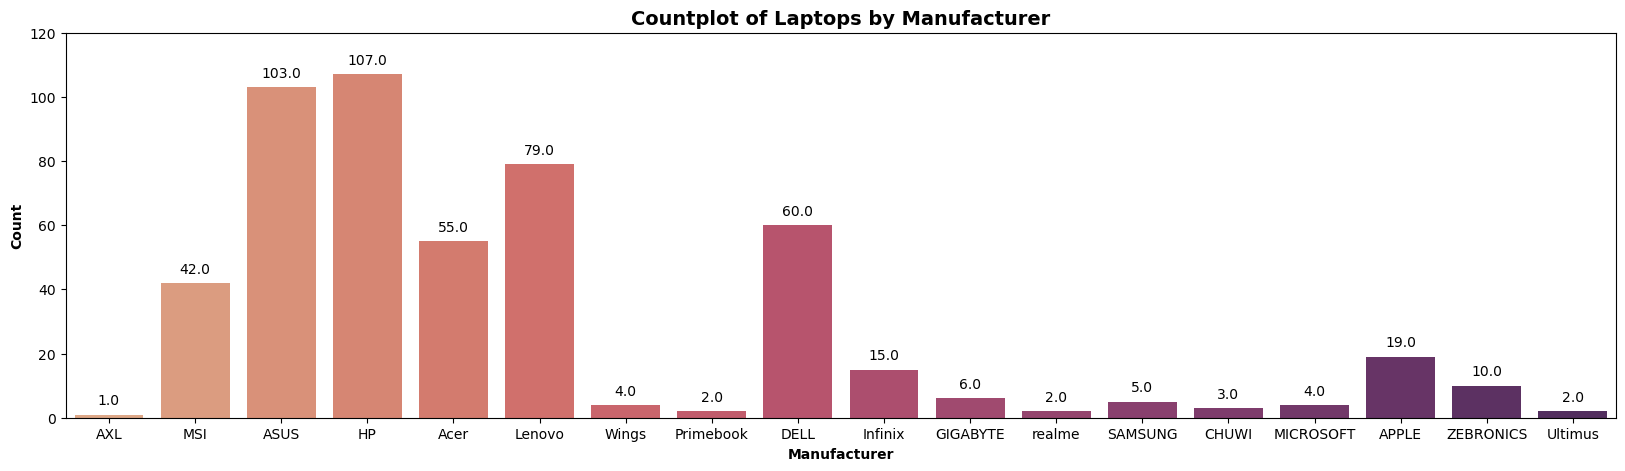

In [31]:
plt.figure(figsize=(20, 5))
ax = sns.countplot(x='manufacturer', data=df, palette='flare')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot of Laptops by Manufacturer',fontsize=14, fontweight='bold')
plt.xlabel('Manufacturer', fontweight='bold')
plt.ylim(0,120)
plt.ylabel('Count', fontweight='bold')
plt.show()

* **HP is the most popular laptop brand.**

### **6. Most Selling CPU Brand**

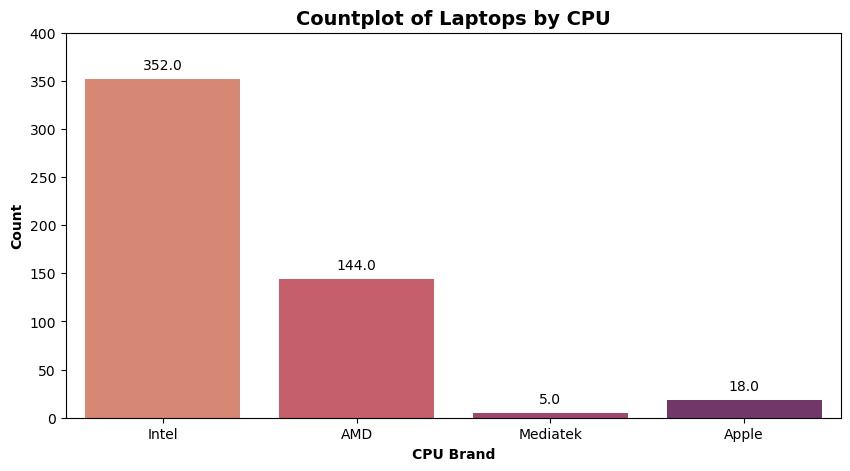

In [32]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='cpu', data=df, palette='flare')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot of Laptops by CPU',fontsize=14, fontweight='bold')
plt.xlabel('CPU Brand', fontweight='bold')
plt.ylim(0,400)
plt.ylabel('Count', fontweight='bold')
plt.show()

* **Intel is the most popular CPU brand.**

### 7. **Most Popular Storage Solution**

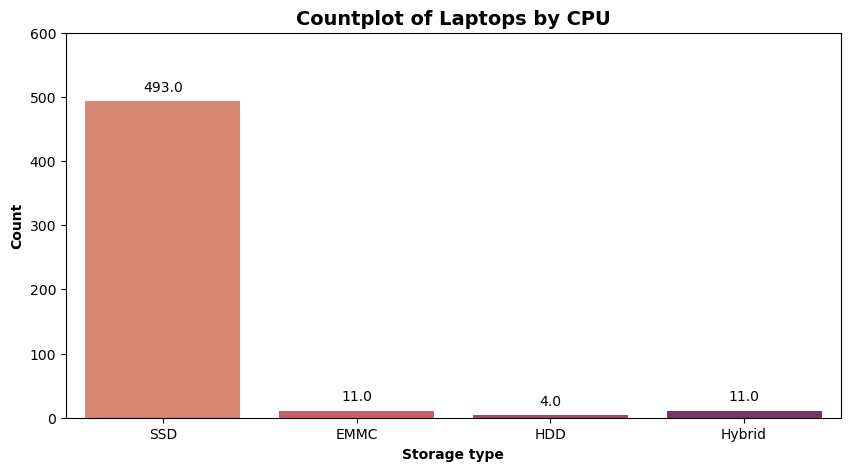

In [33]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='storage_type', data=df, palette='flare')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title('Countplot of Laptops by CPU',fontsize=14, fontweight='bold')
plt.xlabel('Storage type', fontweight='bold')
plt.ylim(0,600)
plt.ylabel('Count', fontweight='bold')
plt.show()

* **SSD is the most common storage solution.**

# **Conclusion**
---

* **Most Expensive Laptop:** ASUS ROG Zephyrus Duo 16
* **Cheapest Laptop:** Ultimus Celeron Dual Core
* **Most Famous Laptop Brand:** HP
* **Most Famoust CPU Brand:** Intel
* **Price Rises with increase in RAM:** True
* **Price Rises with increase in Storage:** True

---